In [261]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.special import stdtrit

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
247         NaN
248         NaN
249         NaN
250         NaN
251    0.009668
Name: nav_pct, Length: 252, dtype: float64
0.012411781193663275
0.012411781193663275
nan


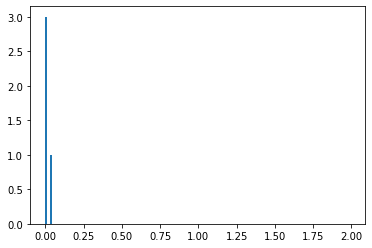

In [262]:
# Calibration of wealth flows (pct variation of funds net asset value)

print(df['nav_pct'])
pct_changes = list(df['nav_pct'])
# print(pct_changes)
print(np.nanmean(pct_changes))
for i in range(len(pct_changes)):
    if pct_changes[i] > 1000:
        pct_changes[i] = 1000
print(np.nanmean(pct_changes))
print(max(pct_changes))
bins = range(0,200)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()




In [263]:
print(df['WShare_VI'].iloc[-1])
print(df['WShare_NT'].iloc[-1])
print(df['WShare_TF'].iloc[-1])

32.74811955939651
33.59891651832367
33.65296392227983


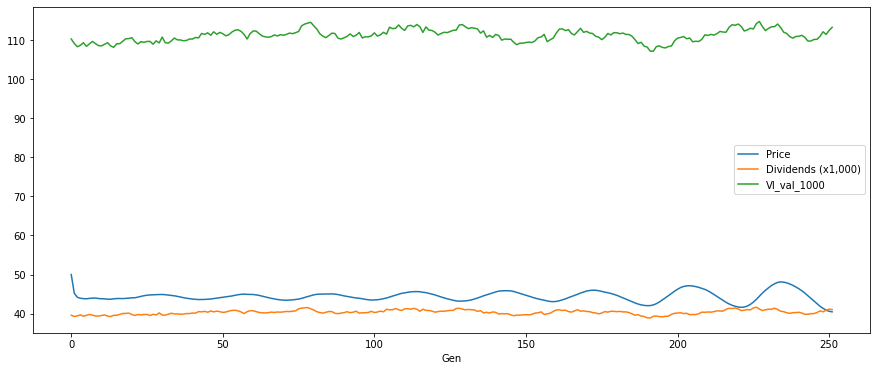

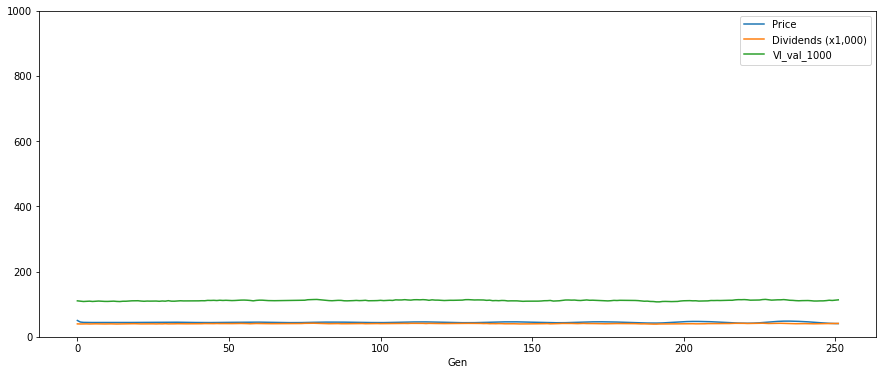

In [264]:
df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6))
plt.show()

df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6), ylim = (0,1_000))
plt.show()



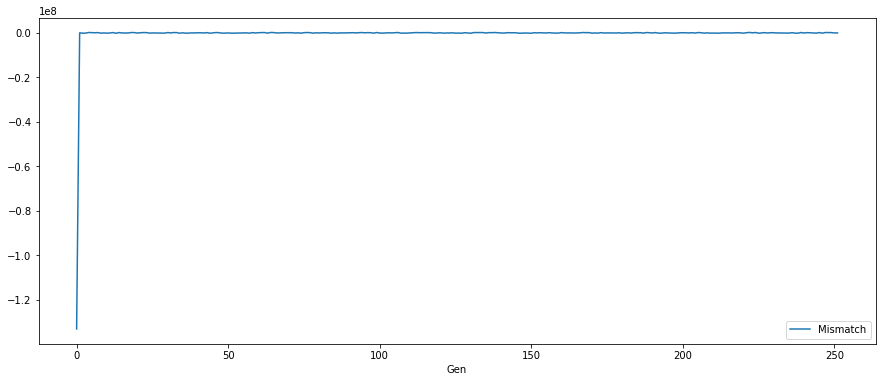

In [265]:

df.plot(x="Gen", y = ["Mismatch"],
        kind="line", figsize=(15, 6))
plt.show()


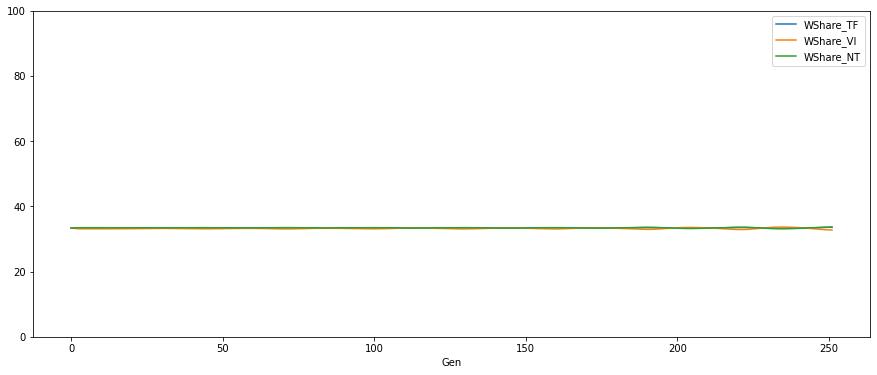

In [266]:

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
# plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()


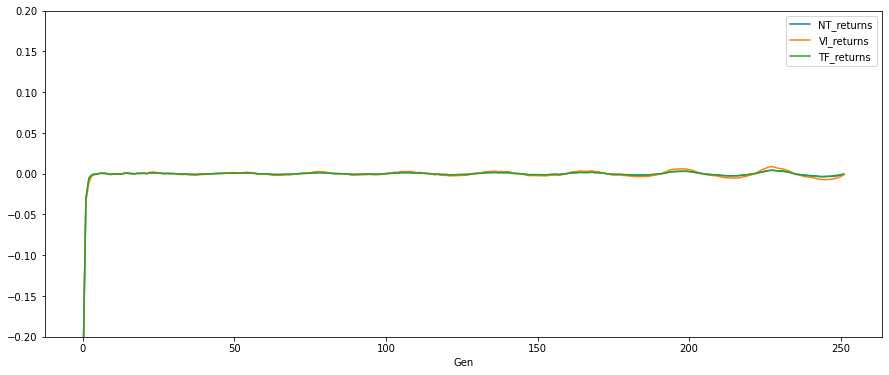

In [267]:

df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns"],
        kind="line", figsize=(15, 6), ylim=(-0.2,0.2))
plt.show()

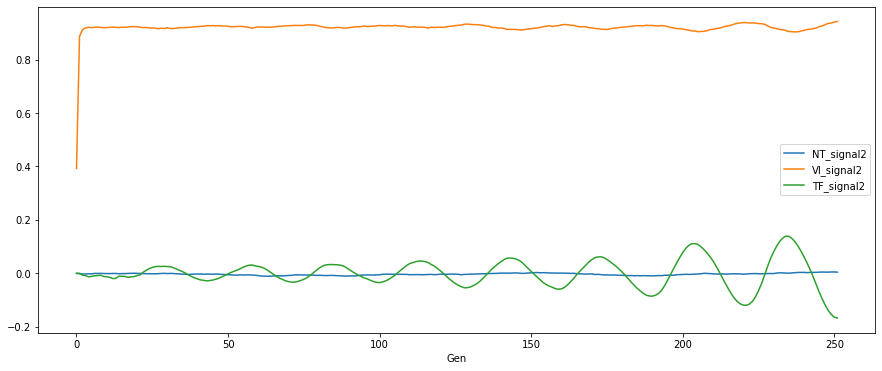

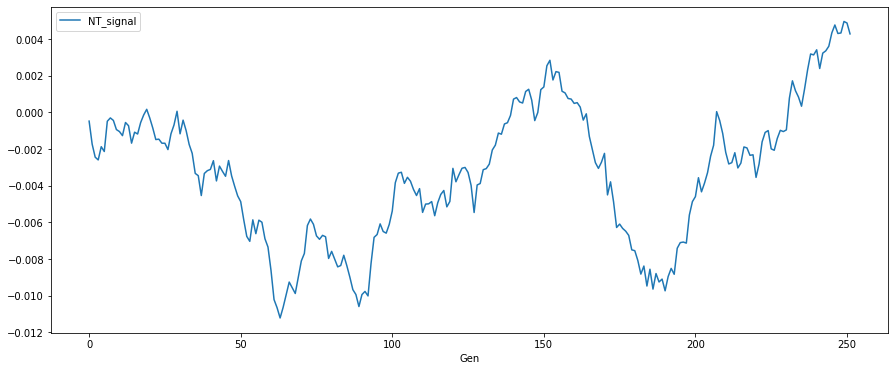

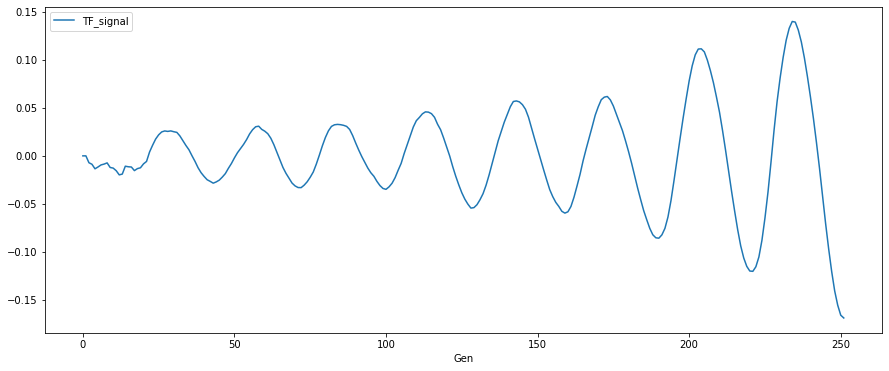

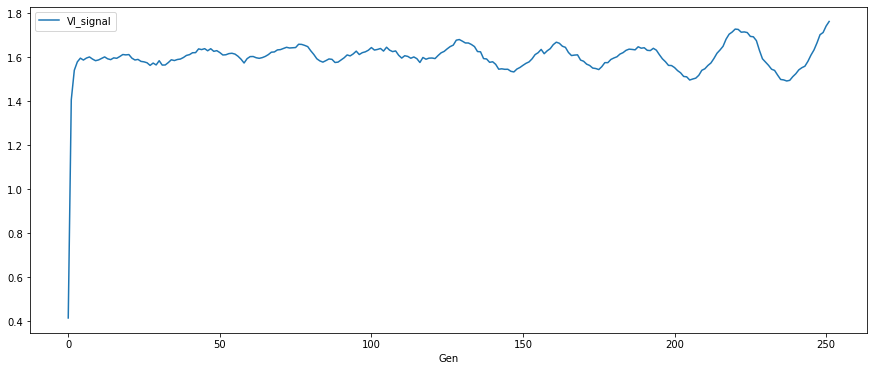

In [268]:
df['NT_signal2'] = np.tanh(df['NT_signal'])
df['VI_signal2'] = np.tanh(df['VI_signal'])
df['TF_signal2'] = np.tanh(df['TF_signal'])

df.plot(x="Gen", y=["NT_signal2", "VI_signal2", "TF_signal2"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y=["NT_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["TF_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["VI_signal"],
        kind="line", figsize=(15, 6))
plt.show()


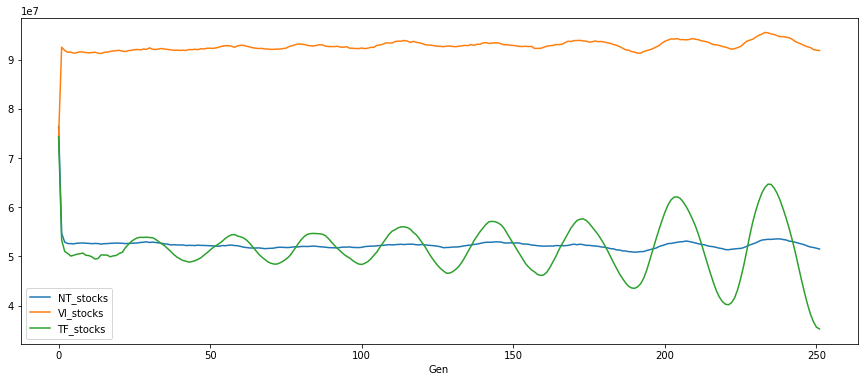

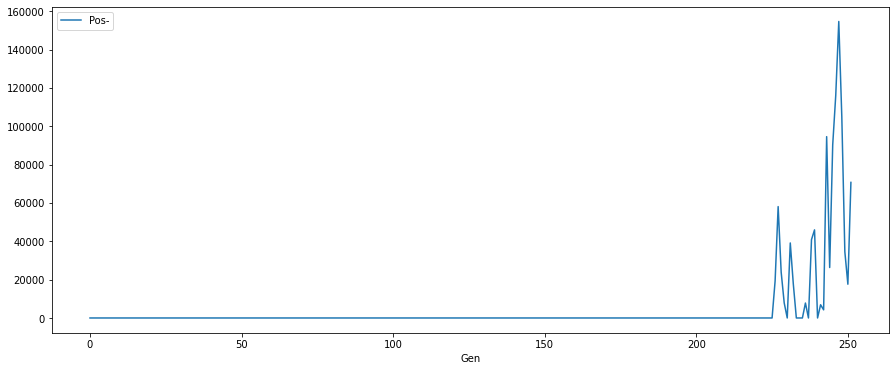

In [269]:
df.plot(x="Gen", y = ["NT_stocks", "VI_stocks", "TF_stocks"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["Pos-"],
        kind="line", figsize=(15, 6))
plt.show()


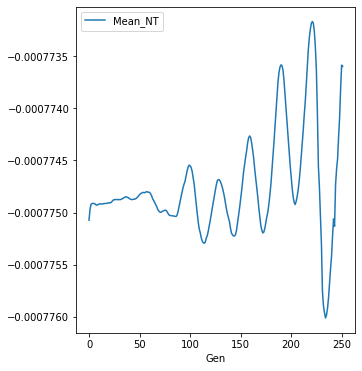

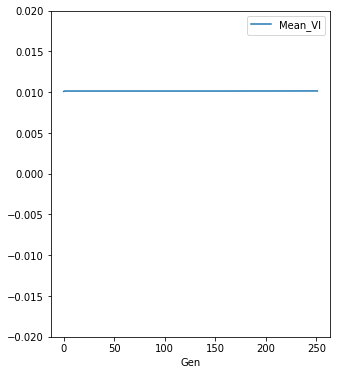

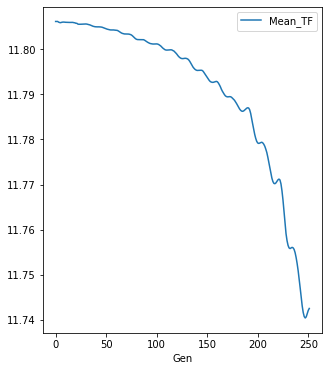

In [270]:

df.plot(x="Gen", y = ["Mean_NT"],
        kind="line", figsize=(5, 6))
plt.show()
df.plot(x="Gen", y = ["Mean_VI"],
        kind="line", figsize=(5, 6), ylim=(-0.02, 0.02))
plt.show()
df.plot(x="Gen", y = ["Mean_TF"],
        kind="line", figsize=(5, 6))
plt.show()

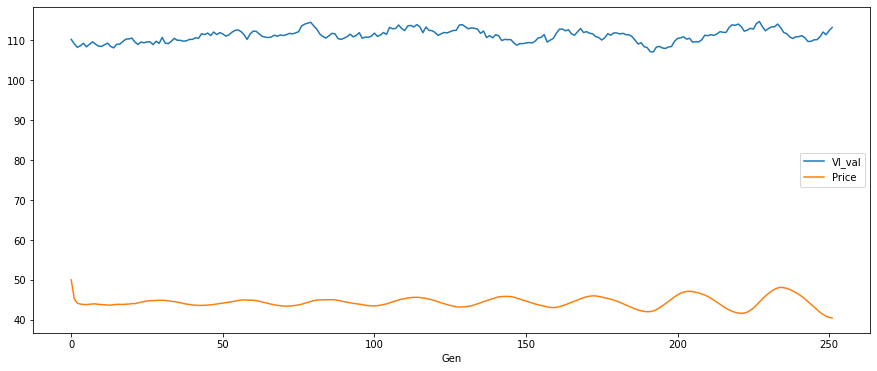

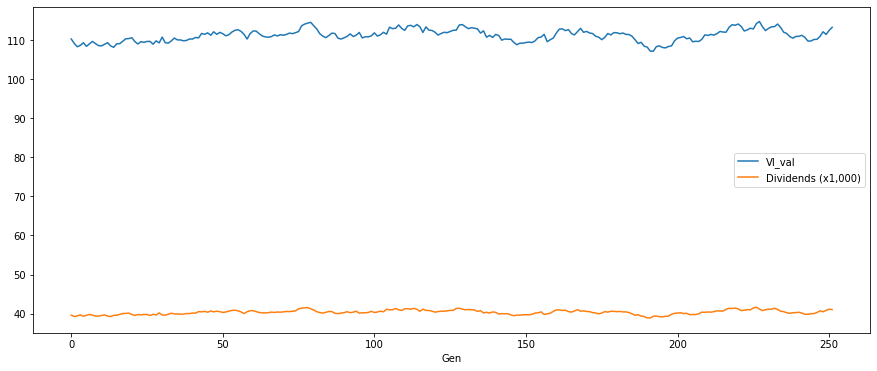

In [271]:
df.plot(x="Gen", y=["VI_val", "Price"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y=["VI_val", "Dividends (x1,000)"],
        kind="line", figsize=(15, 6))
plt.show()

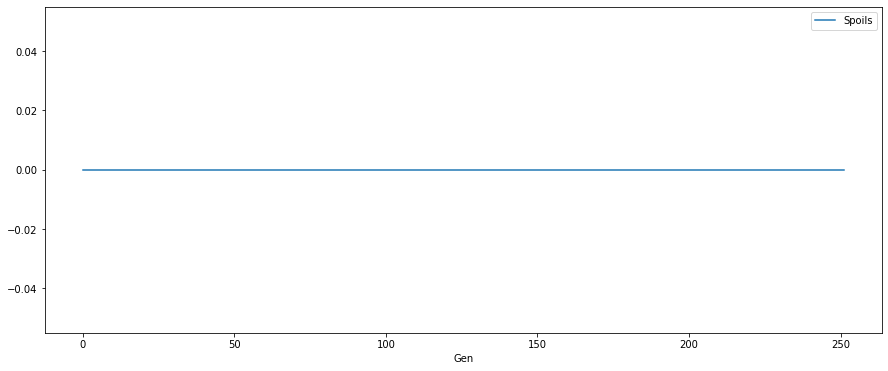

In [272]:
df.plot(x="Gen", y = ["Spoils"],
        kind="line", figsize=(15, 6))
plt.show()


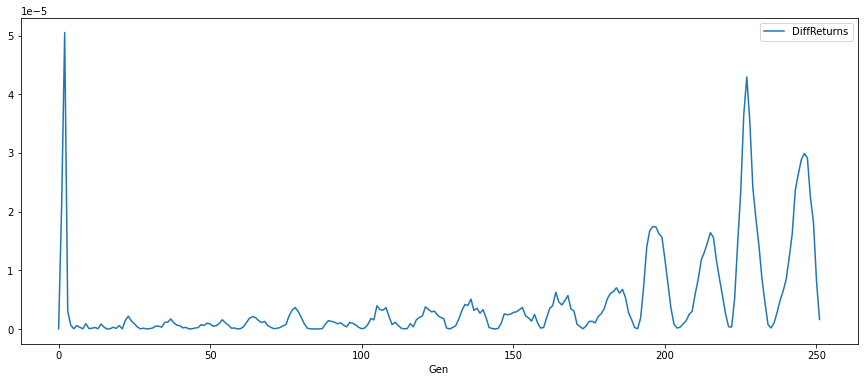

In [273]:
df.plot(x="Gen", y = ["DiffReturns"],
        kind="line", figsize=(15, 6))
plt.show()

In [274]:
if df['AvgT'].sum() != 0:

        print(df['AvgT'].mean())

        df.plot(x="Gen", y = ["AvgT", "HighestT","AvgAbsT"],
                kind="line", figsize=(15, 6))
        plt.show()


In [275]:
SharpeNT = np.nanmean(df['NT_returns']) / np.nanstd(df['NT_returns'])
SharpeVI = np.nanmean(df['VI_returns']) / np.nanstd(df['VI_returns'])
SharpeTF = np.nanmean(df['TF_returns']) / np.nanstd(df['TF_returns'])

print('Daily Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Daily mean returns 2 ')
print([np.nanmean(df['NT_returns']), np.nanmean(df['VI_returns']), np.nanmean(df['TF_returns'])])

DiffSharpe = (SharpeNT - SharpeVI) ** 2  + (SharpeNT - SharpeTF) ** 2 + (SharpeVI - SharpeTF) ** 2
print(DiffSharpe)



Daily Sharpe ratios 
-0.07311622332147277 -0.07828487774286517 -0.07272856566114028
Daily mean returns 2 
[-0.0011613265881575006, -0.0012598466451788676, -0.001155259740617824]
5.773787093891576e-05


In [276]:
print(df['Rep'].sum())
if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

0.0


In [277]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [278]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

In [279]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

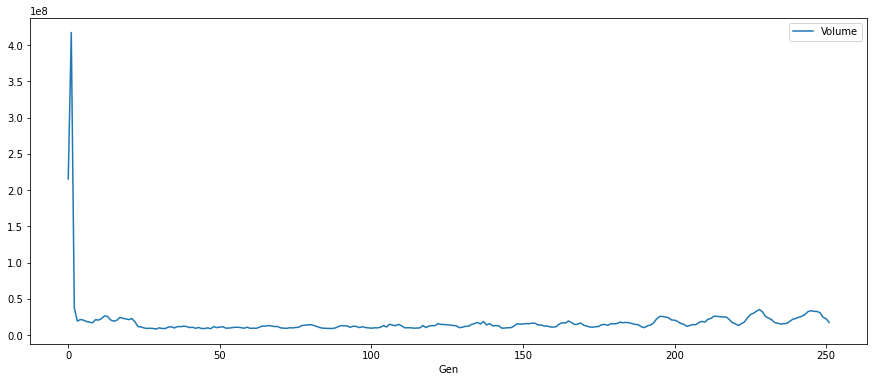

0      2.154095e+08
1      4.173899e+08
2      3.765067e+07
3      1.934240e+07
4      2.155311e+07
           ...     
247    3.270664e+07
248    3.091331e+07
249    2.457655e+07
250    2.260013e+07
251    1.763884e+07
Name: Volume, Length: 252, dtype: float64


In [280]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

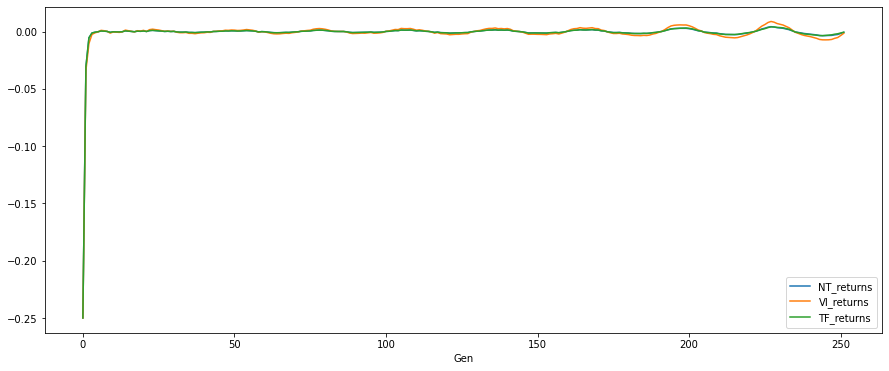

In [281]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns"],
        kind="line", figsize=(15, 6))
plt.show()

# df['DiffReturns'] = (df['NT_returns'] - df['VI_returns']) ** 2 + (df['NT_returns'] - df['TF_returns']) ** 2 + (df['VI_returns'] - df['TF_returns']) ** 2



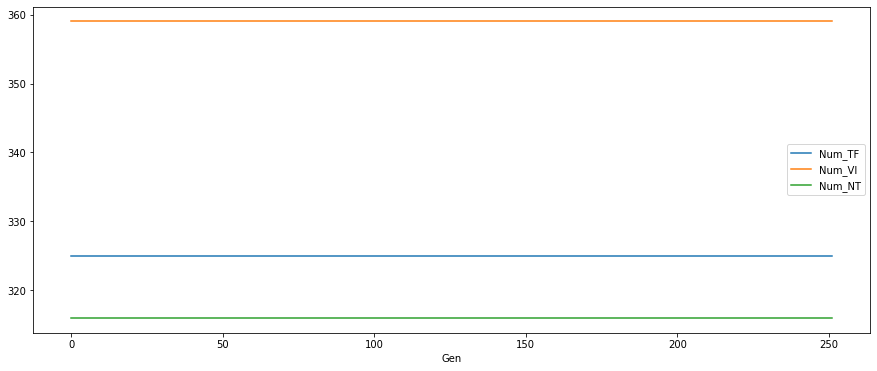

In [282]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


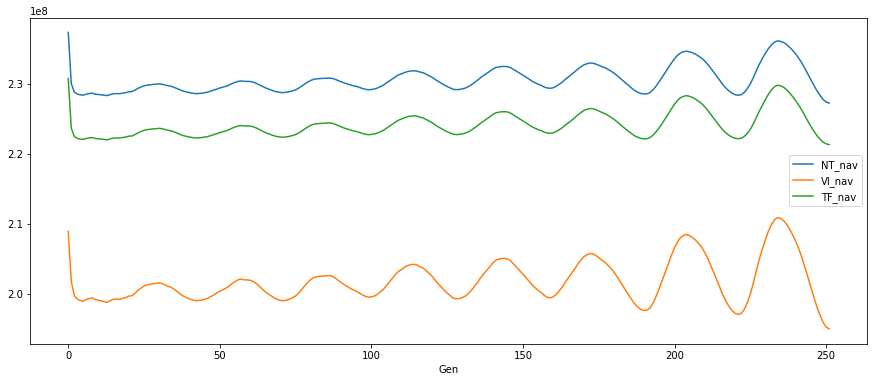

In [283]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()
